<a href="https://colab.research.google.com/github/DanayaDiarra/DanayaGsom/blob/master/Log_Reg()Analysis_Econ_Edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Economic Education

In [ ]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats


# packages for statistical analysis
import statsmodels.api
import statsmodels.formula.api as SmFormApi
import statsmodels.stats as stats


from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey




In [ ]:
#Function for Histogram

def myHist(x, xname, mybins=10):
  pd_x = pd.Series(x)

  #Jarque-Bera TEST for Normality
  print('\n----Jarque-Bera Normality Test for ' + xname+'----')
  print(pd.DataFrame(scipy.stats.jarque_bera(x), columns=["value"],
      index=["Chi^2 Test Statistic", "Chi^2 Test p-value"]))

  #Histogram
  pd_x.plot.hist(grid = True, bins = mybins , rwidth =0.9, color = 'lightblue' )
  plt.title("Plot for " + xname)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.show()

  #QQplot
  qqplot(x, line='s')


#1.Getting and Describing the Data

#1.1 Importing

In [ ]:
# read the data from MS Excel file
data_spector = pd.read_excel("/content/SpectorMazzeo.xlsx", "data", index_col= None, na_values=["NA"] )

In [ ]:
data_spector.head()

,student,grade,gpa,tuce,psi
0,Student1,0,2.66,20,0
1,Student2,0,2.89,22,0
2,Student3,0,3.28,24,0
3,Student4,0,2.92,12,0
4,Student5,1,4.00,21,0


In [ ]:
# splitting the data
data_spectorTrain = data_spector[0:30]
data_spectorTest = data_spector[30:32]

In [ ]:
# Viewing the head of the data frame
data_spectorTrain.head()

,student,grade,gpa,tuce,psi
0,Student1,0,2.66,20,0
1,Student2,0,2.89,22,0
2,Student3,0,3.28,24,0
3,Student4,0,2.92,12,0
4,Student5,1,4.00,21,0


In [ ]:
# extract the variables
grade = data_spectorTrain["grade"]
gpa = data_spectorTrain["gpa"]
tuce = data_spectorTrain["tuce"]
psi = data_spectorTrain["psi"]

In [ ]:
grade.head()

,grade
0,0
1,0
2,0
3,0
4,1


# **1.2.Descriptive Analysis**

All variables

In [ ]:
# calculating basic descriptive statistics

In [ ]:
data_spectorTrain.describe().round(3)

,grade,gpa,tuce,psi
count,30.000,30.000,30.000,30.000
mean,0.333,3.142,22.067,0.400
std,0.479,0.463,3.991,0.498
min,0.000,2.060,12.000,0.000
25%,0.000,2.830,20.000,0.000
50%,0.000,3.075,23.000,0.000
75%,1.000,3.525,25.000,1.000
max,1.000,4.000,29.000,1.000


# Analysis of GPA


----Jarque-Bera Normality Test for GPA----
                         value
Chi^2 Test Statistic  0.263272
Chi^2 Test p-value    0.876660


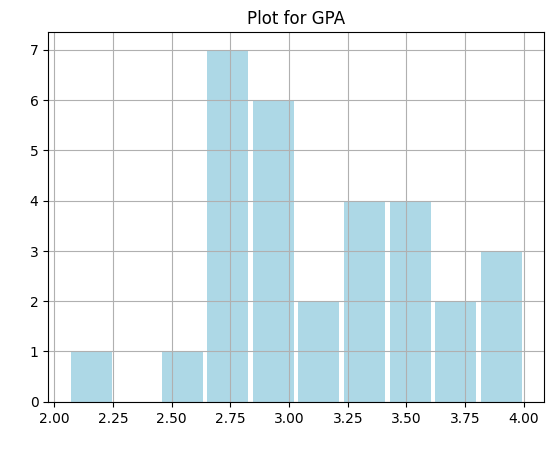

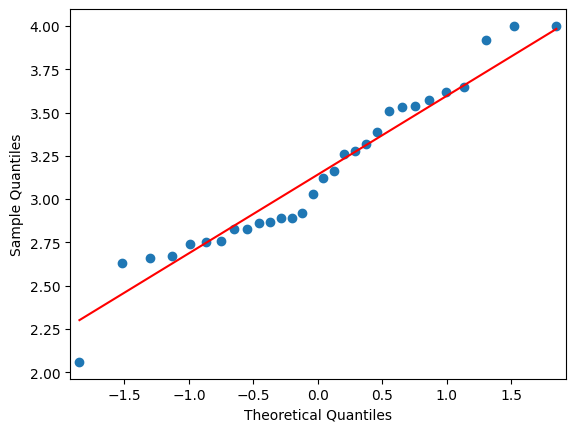

In [ ]:
#Normality analysis of GPA
myHist(gpa, "GPA",  mybins=10)

# Analysis of TUCE


----Jarque-Bera Normality Test for TUCE----
                         value
Chi^2 Test Statistic  1.859526
Chi^2 Test p-value    0.394647


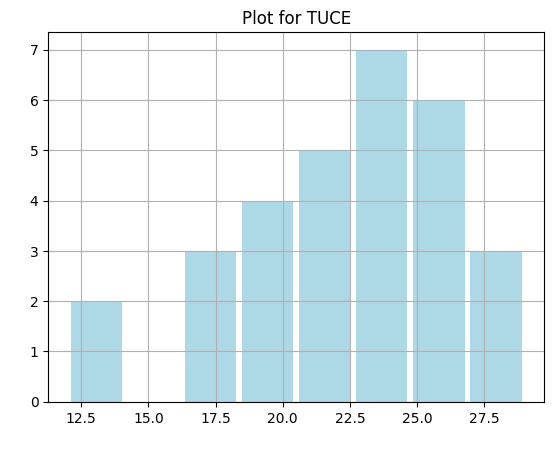

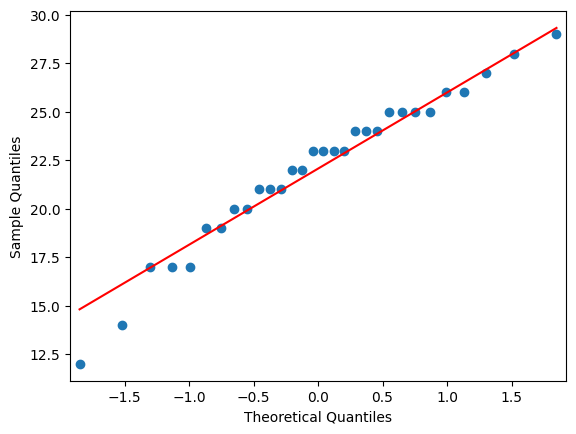

In [ ]:
# Normality of TUCE
myHist(tuce, "TUCE", mybins = 8)

#1.3. Descriptive Analysis by Group(GRADE)

Variable GPA

In [ ]:
# descriptive statistics of GPA
data_spectorTrain.groupby("grade")["gpa"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
0,20.0,2.944,0.365,2.06,2.748,2.88,3.160,3.57
1,10.0,3.537,0.385,2.83,3.292,3.58,3.852,4.00


<Axes: title={'center': 'gpa'}, xlabel='grade'>

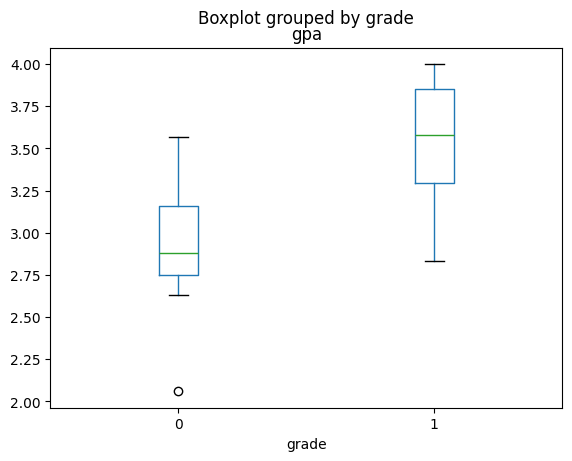

In [ ]:
# boxplots of GPA by groups
data_spectorTrain.boxplot(column= "gpa", by = "grade", grid=False)

In [ ]:
# comparing the medians of GPA of the two groups
t_Ugpa, pVAl_Ugpa = scipy.stats.mannwhitneyu(data_spectorTrain['gpa'][data_spectorTrain.grade ==0],
                                             data_spectorTrain['gpa'][data_spectorTrain.grade==1])
print("Two_sample t-statistic =", round(t_Ugpa, 3))
print("Two_sample pValue =", round(pVAl_Ugpa, 3))

Two_sample t-statistic = 26.5
Two_sample pValue = 0.001


In [ ]:
# comparing means of GPA
eqVarGPA = False

t_twogpa, pVal_twogpa = scipy.stats.ttest_ind(data_spectorTrain['gpa'][data_spectorTrain.grade==0],
                                             data_spectorTrain['gpa'][data_spectorTrain.grade==1], equal_var=eqVarGPA)

print("Variance of Group0 =", round(np.var(data_spectorTrain['gpa'][data_spectorTrain.grade==0], ddof=1),3))
print("Variance of Group1 =", round(np.var(data_spectorTrain['gpa'][data_spectorTrain.grade==1], ddof=1),3))
print("Two-sample t-statistic =", round(t_twogpa,3))
print("Two-sample p-value =", round(pVal_twogpa,3))
print("equal_var =", eqVarGPA)

Variance of Group0 = 0.133
Variance of Group1 = 0.148
Two-sample t-statistic = -4.041
Two-sample p-value = 0.001
equal_var = False


**Variable TUCE**

In [ ]:
# descriptive statistics of TUCE
data_spectorTrain.groupby("grade")["tuce"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
0,20.0,21.1,3.878,12.0,19.0,22.0,24.0,26.0
1,10.0,24.0,3.651,17.0,21.5,24.5,26.5,29.0


<Axes: title={'center': 'tuce'}, xlabel='grade'>

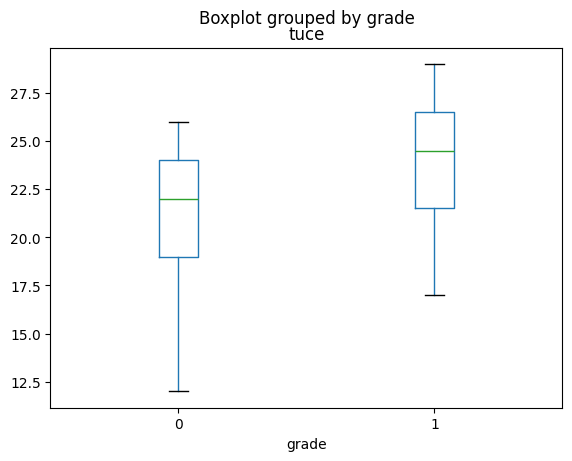

In [ ]:
# boxplots of TUCE by groups
data_spectorTrain.boxplot(column="tuce", by= "grade", grid =False)

In [ ]:
# compare the medians of TUCE
t_Utuce, pVal_Utuce = scipy.stats.mannwhitneyu(data_spectorTrain['tuce'][data_spectorTrain.grade==0],
                                             data_spectorTrain['tuce'][data_spectorTrain.grade==1])

print("Two-sample t-statistic = ", round(t_Utuce,3))
print("Two-sample p-value = ", round(pVal_Utuce,3))

Two-sample t-statistic =  58.5
Two-sample p-value =  0.07


In [ ]:
# compare means of TUCE
eqVarTUCE = False
t_twotuce, pVal_twotuce = scipy.stats.ttest_ind(data_spectorTrain['tuce'][data_spectorTrain.grade==0],
                                             data_spectorTrain['tuce'][data_spectorTrain.grade==1], equal_var=eqVarTUCE)

print("Variance of Group0 =", round(np.var(data_spectorTrain['tuce'][data_spectorTrain.grade==0], ddof=1),3))
print("Variance of Group1 =", round(np.var(data_spectorTrain['tuce'][data_spectorTrain.grade==1], ddof=1),3))
print("Two-sample t-statistic =", round(t_twotuce,3))
print("Two-sample p-value =", round(pVal_twotuce,3))
print("equal_var =", eqVarTUCE)

Variance of Group0 = 15.042
Variance of Group1 = 13.333
Two-sample t-statistic = -2.008
Two-sample p-value = 0.059
equal_var = False


**Variable PSI**

In [ ]:
data_spectorTrain.groupby("grade")["psi"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
0,20.0,0.25,0.444,0.0,0.00,0.0,0.25,1.0
1,10.0,0.70,0.483,0.0,0.25,1.0,1.00,1.0


In [ ]:
# count values of PSI
data_spectorTrain["psi"].value_counts()

,count
psi,
0,18
1,12


In [ ]:
# Contingency Table
xTab = pd.crosstab(grade, psi)
xTab

psi,0,1
grade,,
0,15,5
1,3,7


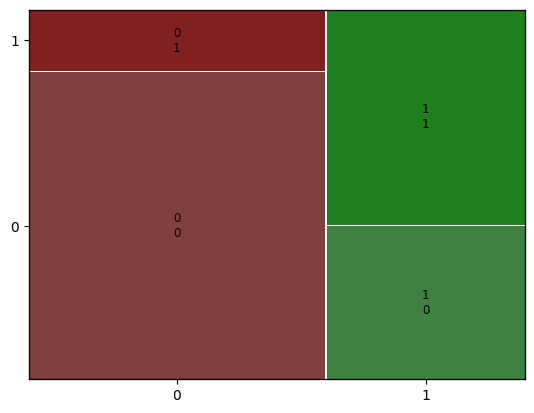

In [ ]:
#Mosaic Plot
# first argument - x-axis; second argument - y-axis
#props = lambda key: {'color': 'gray'}
mosaic(data_spectorTrain, ['psi', 'grade'])
plt.show()

In [ ]:
# Pearson's chi2-test for independence
t_chi2, pVal_chi2, _, _ = scipy.stats.chi2_contingency(xTab)

print("-----------Pearson's chi2-test for independence-----------")
print("Test statistic = ", round(t_chi2,3))
print("Test p-value = ", round(pVal_chi2,3))

-----------Pearson's chi2-test for independence-----------
Test statistic =  3.906
Test p-value =  0.048


# Pair-Wise EDA

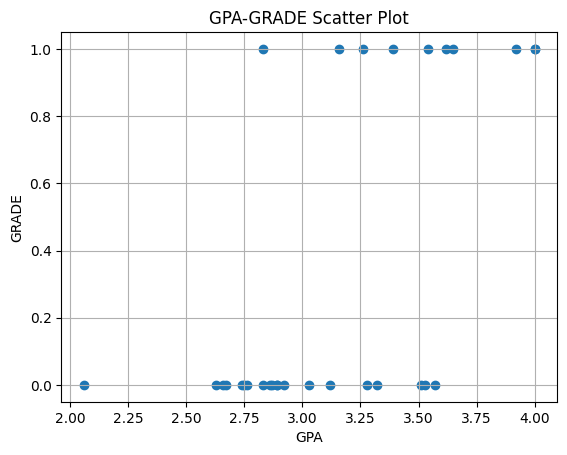

In [ ]:
# scatter plot (not very informative!)
plt.scatter(gpa, grade)
plt.xlabel("GPA")
plt.ylabel("GRADE")
plt.title("GPA-GRADE Scatter Plot")
plt.grid()
plt.show()

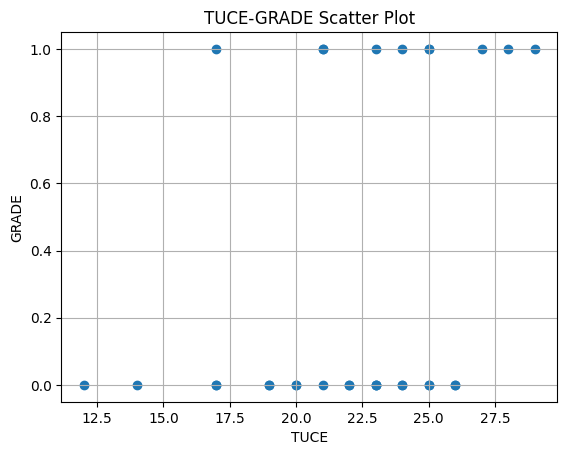

In [ ]:
# scatter plot (not very informative!)
plt.scatter(tuce, grade)
plt.xlabel("TUCE")
plt.ylabel("GRADE")
plt.title("TUCE-GRADE Scatter Plot")
plt.grid()
plt.show()

In [ ]:
# run a pair-wise correlation analysis (normally distributed!)
coefPears, pvPears= scipy.stats.pearsonr(gpa, tuce)

print("Pearson's correlation = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation =  0.366
Pearson's p-value =  0.047


#3.Linear Regression Analysis

#3.1.Model 1: Multivariate Linear Regression

In [ ]:
# estimating Model 1
model1 = SmFormApi.ols('grade ~ gpa + tuce + psi', data_spectorTrain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     9.379
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           0.000225
Time:                        19:52:23   Log-Likelihood:                -9.0053
No. Observations:                  30   AIC:                             26.01
Df Residuals:                      26   BIC:                             31.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8125      0.496     -3.654      0.001      -2.832      -0.793
gpa            0.5602      0.152      3.695      0.001       0.249       0.872
tuce           0.0112      0.018      0.634      0.532      -0.025       0.048
psi            0.3451      0.133      2.601      0.015       0.072       0.618
==============================================================================
Omnibus:                        0.500   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.169
Skew:                          -0.184   Prob(JB):                        0.919
Kurtosis:                       3.004   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#3.2 Tests of Model

In [ ]:
# store model residuals
resids1 = model1.resid


----Jarque-Bera Normality Test for Residuals of Model 1----
                         value
Chi^2 Test Statistic  0.169306
Chi^2 Test p-value    0.918831


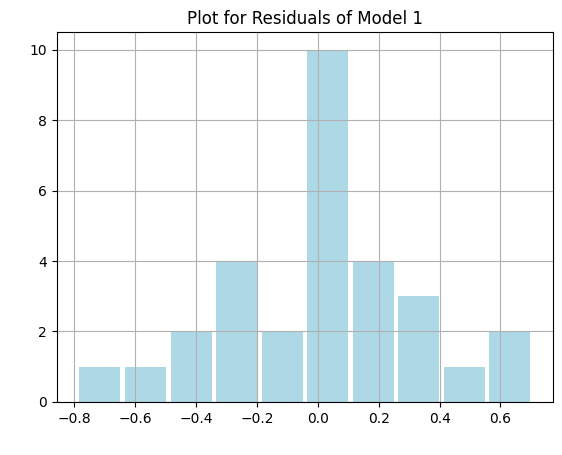

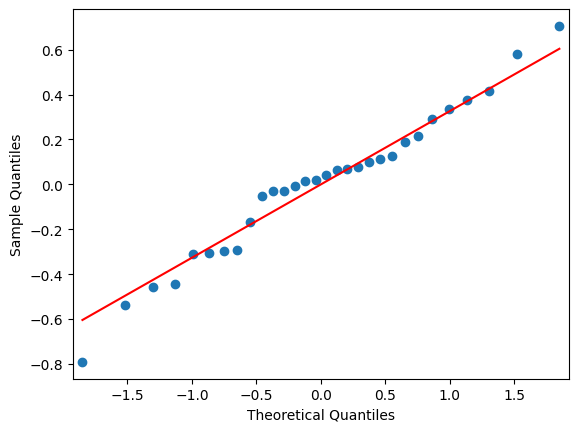

In [ ]:
# normality of residuals of Model 1
myHist(resids1, "Residuals of Model 1")

In [ ]:
# The Breusch-Pagan heteroskedasticity test
BPtest = pd.DataFrame(stats.diagnostic.het_breuschpagan(resids1, model1.model.exog), columns=['value'],
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(BPtest)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  6.044682
chi^2 test p-value    0.109456
F-test statistic      2.186873
F-test p-value        0.113631


In [51]:
#The RESET test
reset1 = reset_ramsey(model1, degree=3)
print(reset1)

<F test: F=0.6749306532723663, p=0.518594432077283, df_denom=24, df_num=2>


In [ ]:
# Multicollinearity Test
dfXX = data_spectorTrain.drop(['student','grade'], axis=1)

dfVIFs = pd.DataFrame()
dfVIFs['regressor'] = dfXX.columns
dfVIFs['VIF'] = np.linalg.inv(dfXX.corr().to_numpy()).diagonal().round(2)
dfVIFs

,regressor,VIF
0,gpa,1.16
1,tuce,1.17
2,psi,1.03


# 4. Logistic Regression

### 4.1. MODEL2: Logit-model

In [ ]:
# estimate the model
model2 = SmFormApi.logit(formula='grade ~ gpa + tuce + psi', data=data_spectorTrain).fit()
model2.summary()

# Task: comment on the coefficients and the goodness-of-fit

Optimization terminated successfully.
         Current function value: 0.314917
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  grade   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Jan 2025   Pseudo R-squ.:                  0.5052
Time:                        19:52:24   Log-Likelihood:                -9.4475
converged:                       True   LL-Null:                       -19.095
Covariance Type:            nonrobust   LLR p-value:                 0.0002375
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.9507      7.430     -2.551      0.011     -33.513      -4.388
gpa            4.2348      1.732      2.446      0.014       0.841       7.629
tuce           0.1400      0.174      0.807      0.420      -0.200       0.480
psi            2.6233      1.298      2.021      0.043       0.079       5.167
==============================================================================
"""


----Jarque-Bera Normality Test for Residuals of the Logit model----
                         value
Chi^2 Test Statistic  4.668499
Chi^2 Test p-value    0.096883


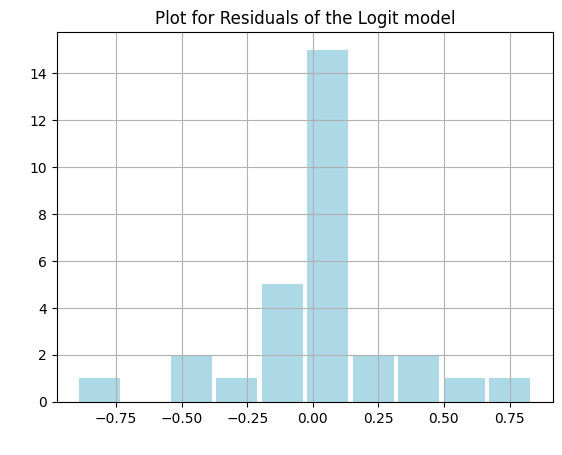

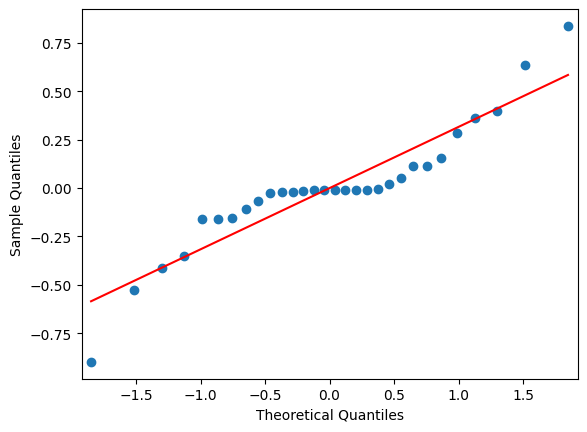

In [ ]:
# check the residuals of Model 2
myHist(model2.resid_response, 'Residuals of the Logit model')

# 4.2 Forecasting with the logit-model

In [ ]:
# out-of-sample predictions -- for students 31 and 32
model2.predict(data_spectorTest)

,0
30,0.435641
31,0.028041


#4.3. Marginal Effects

**Continuous Variable**

In [ ]:
# marginal effects at the average point
print(model2.get_margeff(at='mean').summary())

        Logit Marginal Effects       
Dep. Variable:                  grade
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa            0.6293      0.280      2.250      0.024       0.081       1.178
tuce           0.0208      0.024      0.853      0.394      -0.027       0.069
psi            0.3899      0.202      1.933      0.053      -0.005       0.785


**Discrete Variable**

In [ ]:
dfPRC = pd.DataFrame(np.linspace(2, 4, num=50), columns=['gpa'])

In [ ]:
dfPRC

,gpa
0,2.000000
1,2.040816
2,2.081633
3,2.122449
4,2.163265
5,2.204082
6,2.244898
7,2.285714
8,2.326531
9,2.367347


In [ ]:
# data frame for students with PSI=0
dfPSI0 = dfPRC.copy(deep=True)
dfPSI0['tuce'] = np.mean(tuce)
dfPSI0['psi'] = 0
dfPSI0.head()

,gpa,tuce,psi
0,2.000000,22.066667,0
1,2.040816,22.066667,0
2,2.081633,22.066667,0
3,2.122449,22.066667,0
4,2.163265,22.066667,0


In [ ]:
dfPSI0.head()

,gpa,tuce,psi
0,2.000000,22.066667,0
1,2.040816,22.066667,0
2,2.081633,22.066667,0
3,2.122449,22.066667,0
4,2.163265,22.066667,0


In [ ]:
# Predictions for students with PSI=0
predGRADEpsi0 = model2.predict(dfPSI0)

In [ ]:
# data frame for students with PSI=1
dfPSI1 = dfPRC
dfPSI1['tuce'] = np.mean(tuce)
dfPSI1['psi'] = 1
dfPSI1.head()

,gpa,tuce,psi
0,2.000000,22.066667,1
1,2.040816,22.066667,1
2,2.081633,22.066667,1
3,2.122449,22.066667,1
4,2.163265,22.066667,1


In [52]:
# predictions for students with PSI=1
predGRADEpsi1 = model2.predict(dfPSI1)

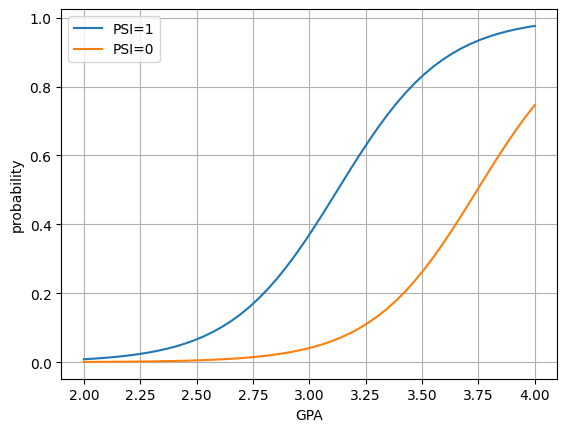

In [53]:
# probability response curves
plt.plot(dfPRC['gpa'], predGRADEpsi1, label="PSI=1")
plt.plot(dfPRC['gpa'], predGRADEpsi0, label="PSI=0")
plt.xlabel('GPA'); plt.ylabel('probability')
plt.grid(); plt.legend()
plt.show()